# Cifar-100 이미지 분류
## 전체 데이터중 일부분만 사용
### 모델 출처: [Divya Agarwal](https://github.com/divya025/Cifar100)

#### CIFAR100 데이터 로드

In [1]:
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

Using TensorFlow backend.


In [2]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

#### 데이터 확인

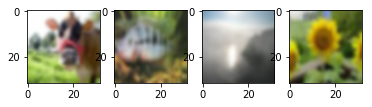

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [6]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding

In [7]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [8]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 100)
Y_test = np_utils.to_categorical(y_test, 100)
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

#### 자료의 일부만 사용하여 모델 테스트 하기

In [9]:
from sklearn.model_selection import train_test_split

seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, 
                                                    test_size=.2, random_state=seed)

#### 모형 구현

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Activation
import numpy as np

np.random.seed(0)

In [12]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

W0821 09:07:33.410433  5692 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 09:07:33.461436  5692 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 09:07:33.470437  5692 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 09:07:33.496438  5692 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 09:07:33.517439  5692 deprecation_wrapper.py:119] From C:\ProgramData\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [15]:
import keras
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=50, 
                    validation_data=(X_test, Y_test), verbose=1)

W0821 09:08:17.714967  5692 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 14s 2ms/step - loss: 4.6055 - acc: 0.0120 - val_loss: 4.5872 - val_acc: 0.0245
Epoch 2/100
8000/8000 [==============================] - 13s 2ms/step - loss: 4.5377 - acc: 0.0242 - val_loss: 4.4293 - val_acc: 0.0300
Epoch 3/100
8000/8000 [==============================] - 13s 2ms/step - loss: 4.3997 - acc: 0.0345 - val_loss: 4.2858 - val_acc: 0.0580
Epoch 4/100
8000/8000 [==============================] - 13s 2ms/step - loss: 4.2984 - acc: 0.0446 - val_loss: 4.1684 - val_acc: 0.0820
Epoch 5/100
8000/8000 [==============================] - 13s 2ms/step - loss: 4.2054 - acc: 0.0560 - val_loss: 4.0674 - val_acc: 0.0910
Epoch 6/100
8000/8000 [==============================] - 13s 2ms/step - loss: 4.1169 - acc: 0.0684 - val_loss: 3.9606 - val_acc: 0.1195
Epoch 7/100
8000/8000 [==============================] - 14s 2ms/step - loss: 4.0327 - acc: 0.0811 - val_loss: 3.8666 - val_acc: 0.1380


8000/8000 [==============================] - 13s 2ms/step - loss: 2.0316 - acc: 0.4541 - val_loss: 3.0687 - val_acc: 0.2880
Epoch 61/100
8000/8000 [==============================] - 13s 2ms/step - loss: 1.9974 - acc: 0.4654 - val_loss: 3.0499 - val_acc: 0.2910
Epoch 62/100
8000/8000 [==============================] - 13s 2ms/step - loss: 1.9769 - acc: 0.4660 - val_loss: 3.0580 - val_acc: 0.2905
Epoch 63/100
8000/8000 [==============================] - 14s 2ms/step - loss: 1.9602 - acc: 0.4761 - val_loss: 3.0660 - val_acc: 0.2905
Epoch 64/100
8000/8000 [==============================] - 13s 2ms/step - loss: 1.9159 - acc: 0.4850 - val_loss: 3.0593 - val_acc: 0.2925
Epoch 65/100
8000/8000 [==============================] - 13s 2ms/step - loss: 1.8752 - acc: 0.4926 - val_loss: 3.0877 - val_acc: 0.2840
Epoch 66/100
8000/8000 [==============================] - 14s 2ms/step - loss: 1.8588 - acc: 0.4921 - val_loss: 3.0733 - val_acc: 0.2940
Epoch 67/100
8000/8000 [==============================

In [17]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

2000/2000 [==============================] - 1s 351us/step

 Test Accuracy: 0.2930


In [18]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

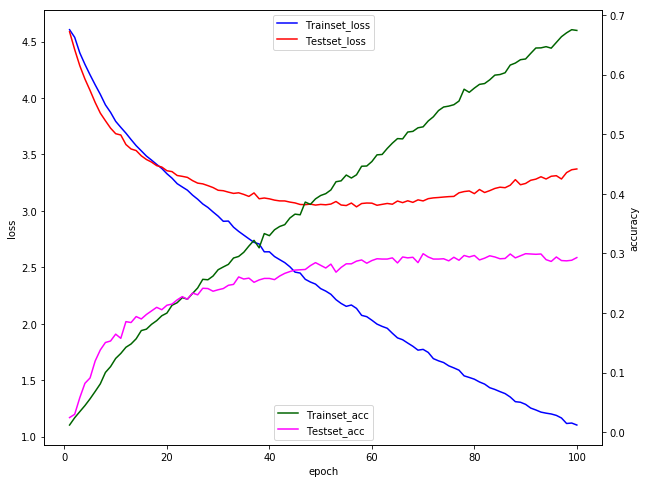

In [35]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()